# HW4

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 10/28/2021
##### By Erik Solhaug
<br>

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30

## Problem 0

In [2]:
t = np.linspace(0,np.pi*100,np.int(1e5))

<ipython-input-2-35aa12aee86b>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.linspace(0,np.pi*100,np.int(1e5))


In [3]:
N = 10+np.sin(t)

In [4]:
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

<ipython-input-4-b852e60f9362>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N


## Problem 1

## A)

In [5]:
first_thousand = bkgd[:1000]

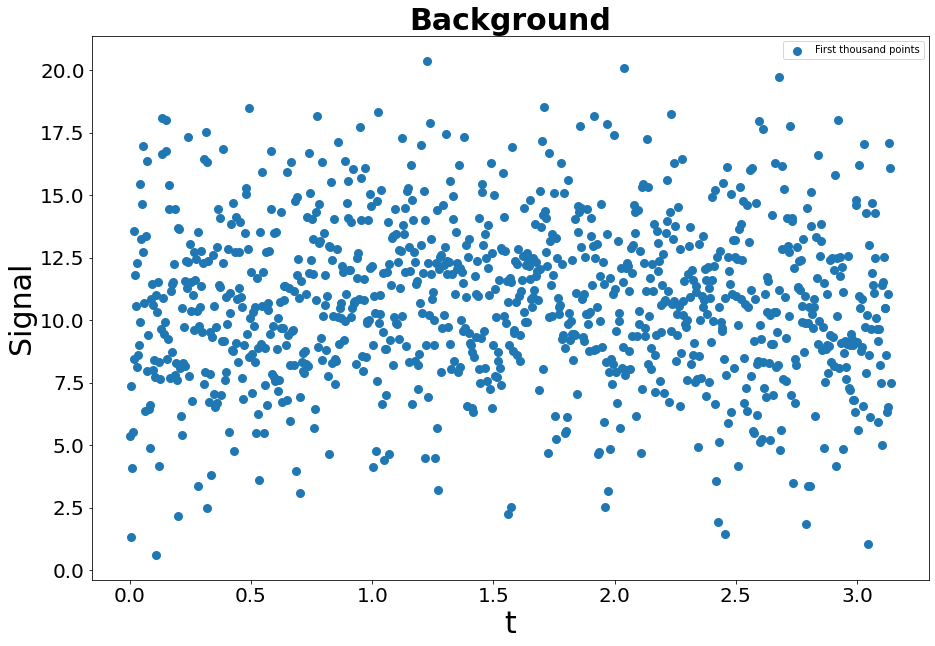

In [6]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.scatter(t[:1000], first_thousand, label = 'First thousand points', linewidth = 3)
ax.set_xlabel('t', fontsize = fsize)
ax.set_ylabel('Signal', fontsize = fsize)
ax.set_title('Background', fontsize = fsize, fontweight = 'bold')
ax.legend()
plt.show()

## B)

In [7]:
def plot_points(X, start, end):
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.scatter(np.arange(start, end), X[start:end], label = 'Data points', linewidth = 3)
    ax.set_xlabel('t', fontsize = fsize)
    ax.set_ylabel('Signal', fontsize = fsize)
    ax.set_title('Background', fontsize = fsize, fontweight = 'bold')
    ax.legend()
    plt.show()

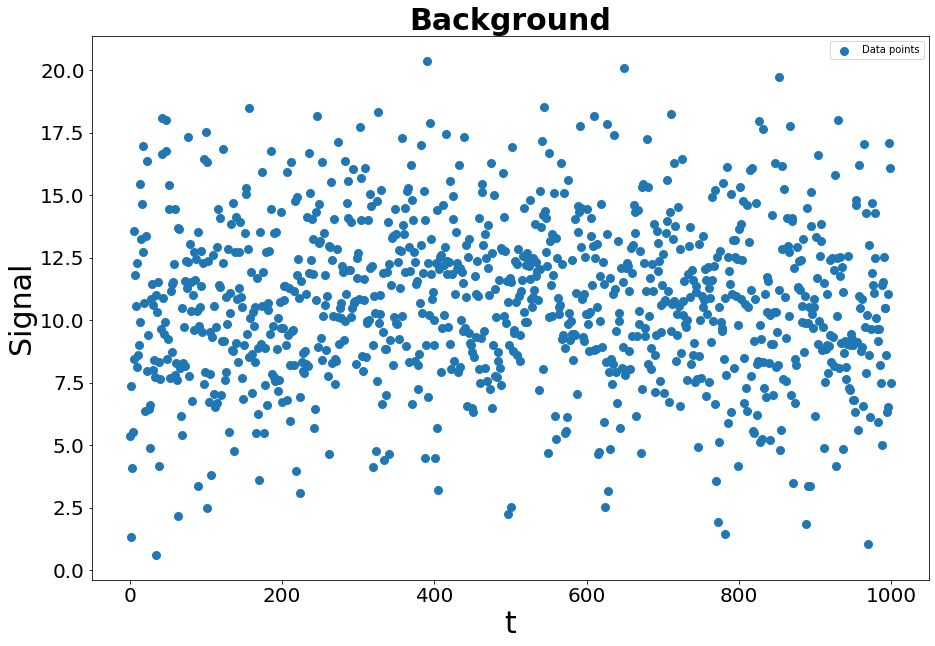

In [8]:
plot_points(bkgd, 0, 1000)

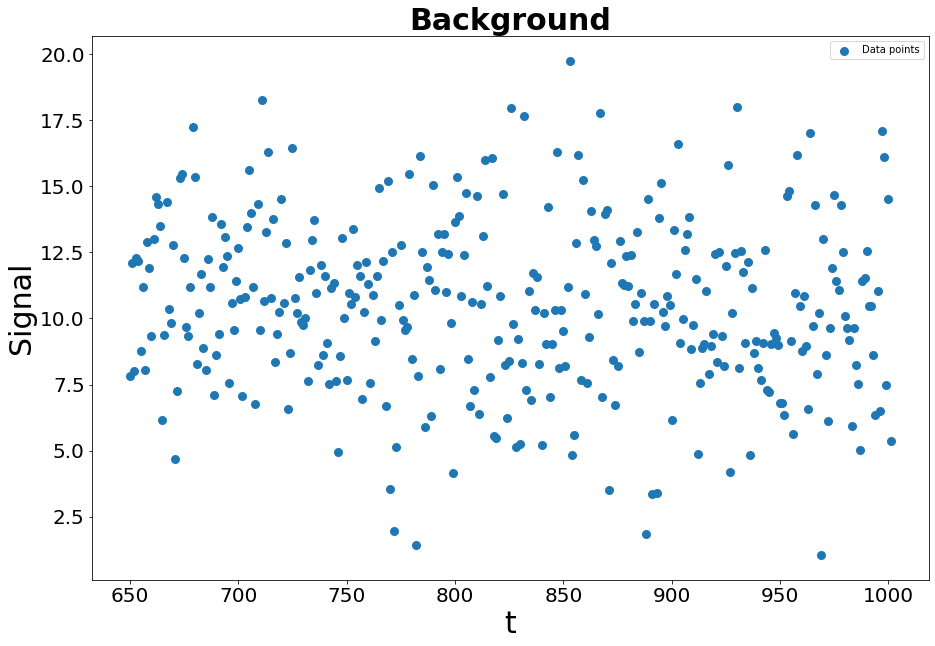

In [9]:
plot_points(bkgd, 650, 1002)

## C)

In [10]:
def plot_points_step(X, start, end, step):
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.scatter(np.arange(start, end, step), X[start:end:step], label = 'Data points', linewidth = 3)
    ax.set_xlabel('t', fontsize = fsize)
    ax.set_ylabel('Signal', fontsize = fsize)
    ax.set_title('Background', fontsize = fsize, fontweight = 'bold')
    ax.legend()
    plt.show()

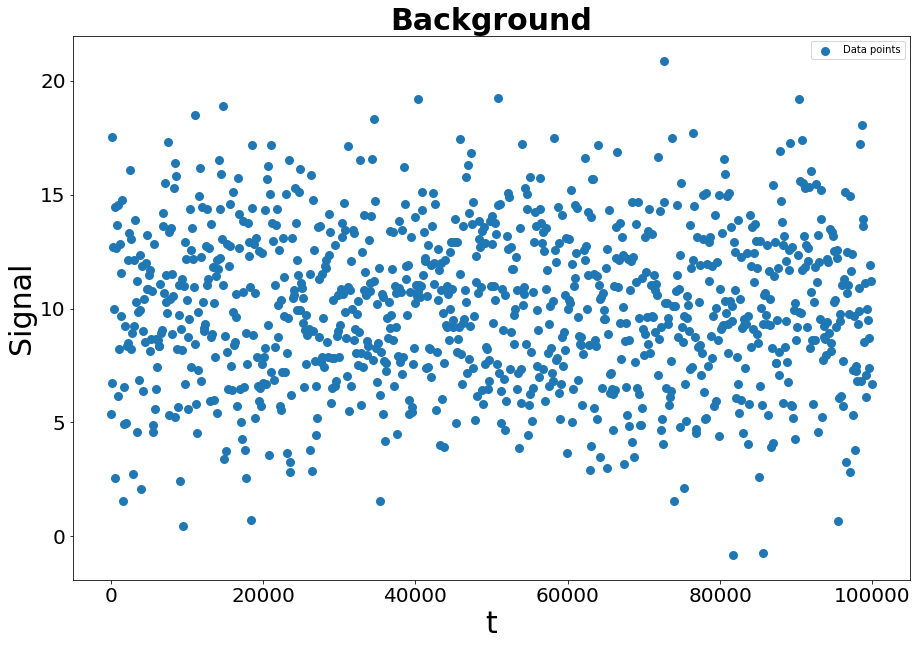

In [11]:
plot_points_step(bkgd, 0, bkgd.size, 100)

## Problem 2

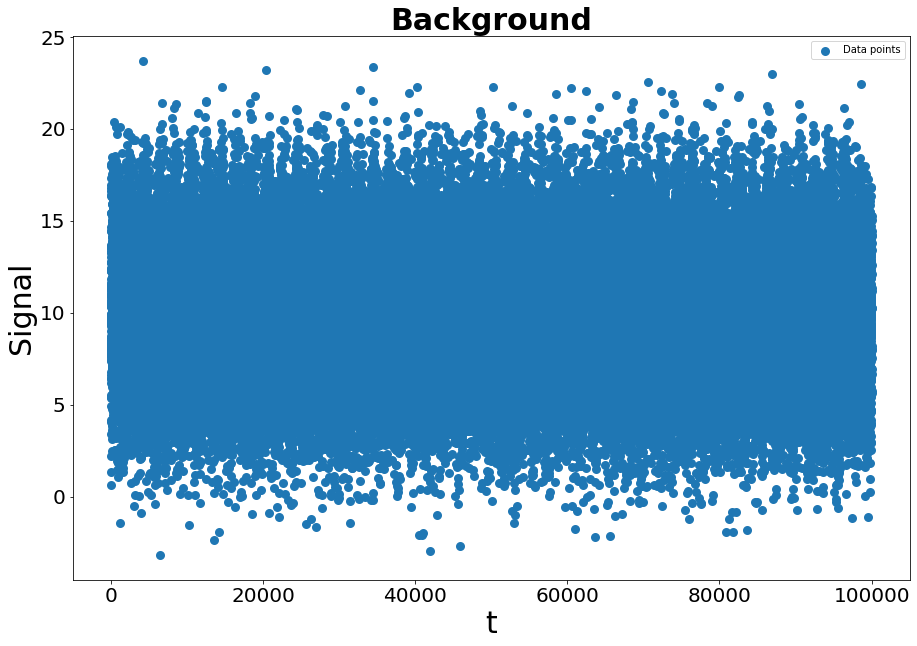

In [12]:
plot_points(bkgd, 0, bkgd.size)

## A)

In [13]:
def plot_density(X, start, end, step, binsize):
    bins = binsize
    
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.hist2d(np.arange(start, end, step), X[start:end:step], bins, linewidth = 3)
    ax.set_xlabel('t', fontsize = fsize)
    ax.set_ylabel('Signal', fontsize = fsize)
    ax.set_title('2D Histogram of Background', fontsize = fsize, fontweight = 'bold')
    ax.set_ylim([0, 20])
    plt.show()

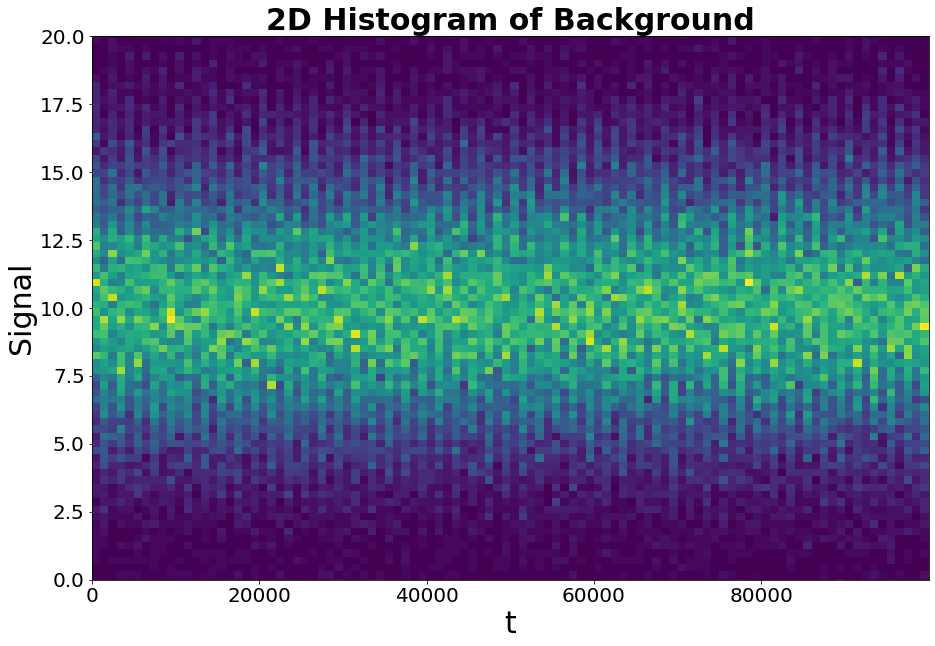

In [14]:
plot_density(bkgd, 0, bkgd.size, 1, 100)

## B)

**What is being plotted in this plot?**

When I plot a 2D histogram showing the data like this, I plot how much signal is being captured per frequency in the dataset. It is a spherical harmonics of some sort.

## Problem 3

## A)

We will take the data modulo with our folding variable.

In [15]:
fold_variable = 2*np.pi

In [16]:
def plot_step_fold_points(X, start, end, step, fold):
    x = np.mod(np.arange(start, end, step), fold)
    y = np.mod(X[start:end:step], fold)
    
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.scatter(x, y, label = 'Data points', linewidth = 3)
    ax.set_xlabel('t', fontsize = fsize)
    ax.set_ylabel('Signal', fontsize = fsize)
    ax.set_title('Folded Background (Scatter)', fontsize = fsize, fontweight = 'bold')
    ax.legend()
    plt.show()

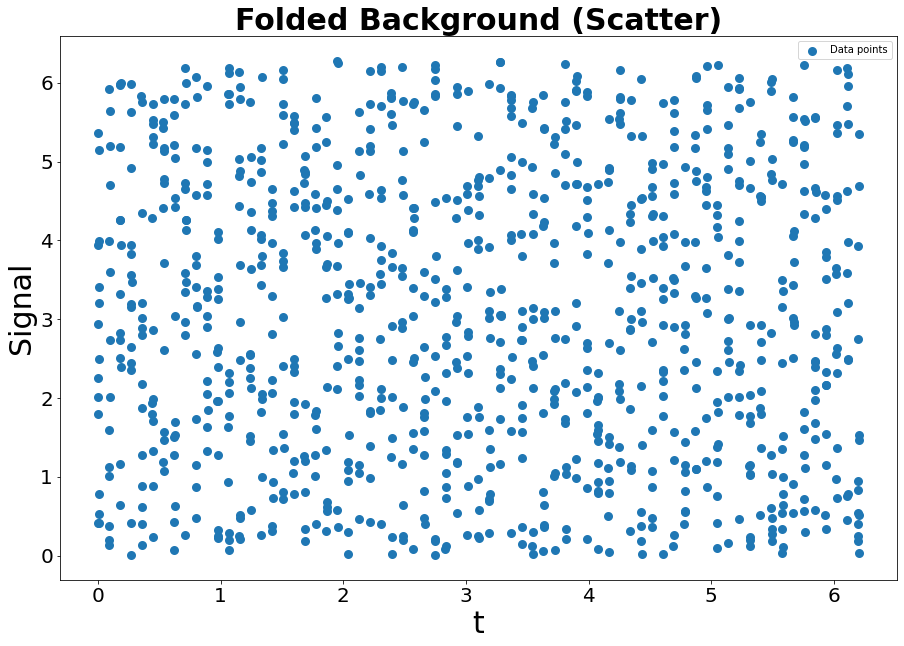

In [17]:
plot_step_fold_points(bkgd, 0, bkgd.size, 100, fold_variable)

## B)

In [18]:
def plot_fold_density(X, start, end, step, binsize, fold):
    bins = binsize
    x = np.mod(np.arange(start, end, step), fold)
    y = np.mod(X[start:end:step], fold)
    
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.hist2d(x, y, bins, linewidth = 3)
    ax.set_xlabel('t', fontsize = fsize)
    ax.set_ylabel('Signal', fontsize = fsize)
    ax.set_title('Folded Background (2D Histogram)', fontsize = fsize, fontweight = 'bold')
    ax.set_ylim([0, 2*np.pi])
    plt.show()

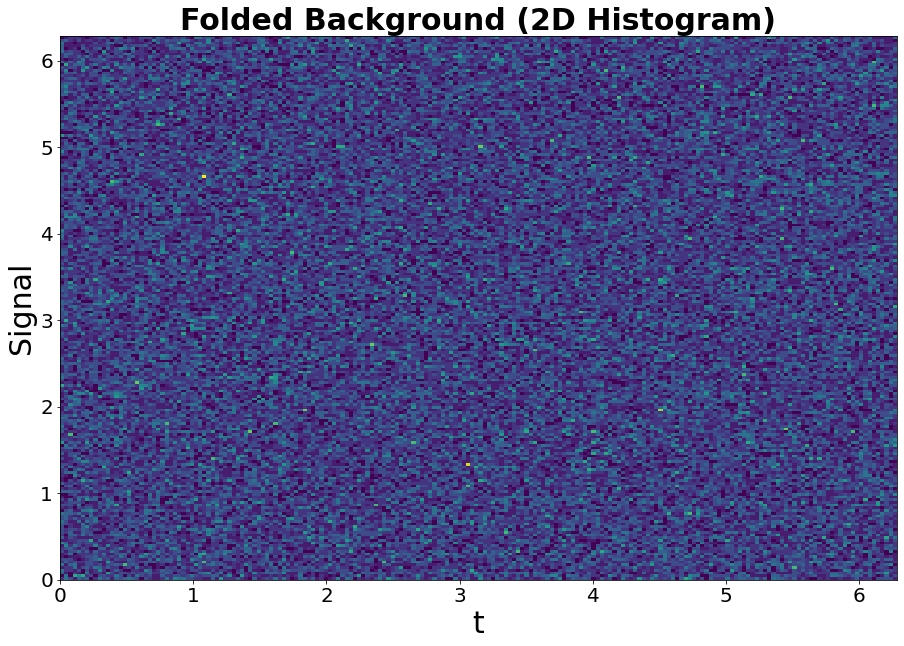

In [19]:
plot_fold_density(bkgd, 0, bkgd.size, 1, 200, fold_variable)

## C)